In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


In [2]:

# Load the dataset with a progress bar
print("Loading dataset...")
df = pd.read_csv('../data/raw_data/phishing/out.csv')

# prog bar
total_rows = len(df)
with tqdm(total=total_rows, unit='row') as pbar:
    for _, _ in df.iterrows():
        pbar.update(1)

# Display basic information about the dataset
print("\nDataset information:")
df.info()

print("\nSample data:")
print(df.head())




Loading dataset...


100%|██████████| 2500000/2500000 [01:52<00:00, 22212.60row/s]


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 276.6+ MB

Sample data:
                                             url          source       label  \
0  apaceast.cloudguest.central.arubane

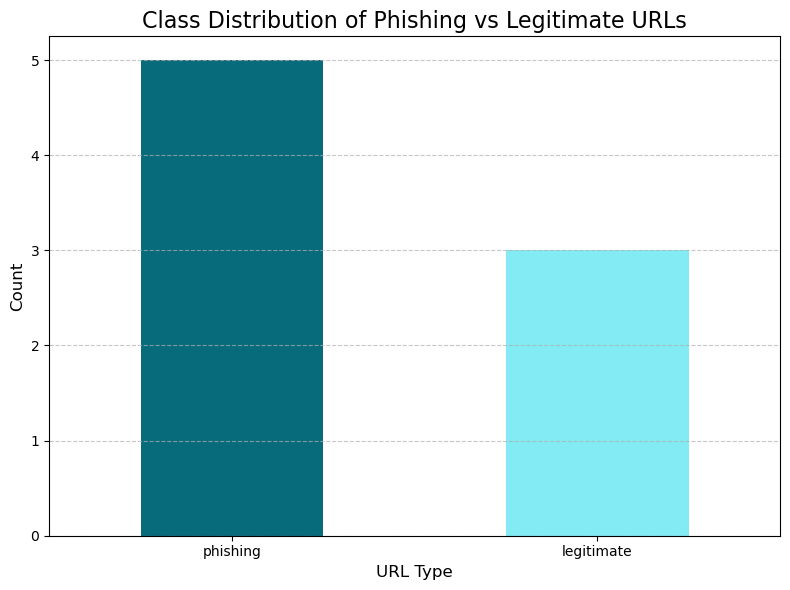

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset: replace this with your actual dataset
data = {
    'label': ['phishing', 'legitimate', 'phishing', 'legitimate', 'phishing', 'legitimate', 'phishing', 'phishing']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Count occurrences of each class (phishing vs legitimate)
class_distribution = df['label'].value_counts()

# Create a bar plot to visualize class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['#086b7c', '#83ebf3'])  # Updated colors to match teal/cyan theme
plt.title('Class Distribution of Phishing vs Legitimate URLs', fontsize=16)
plt.xlabel('URL Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


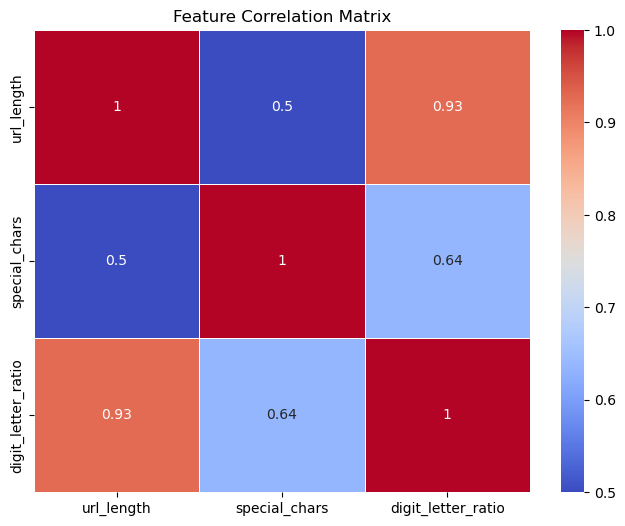

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset: Replace with your actual dataset
data = {
    'url_length': [75, 80, 60, 55, 120, 90, 40, 110],
    'special_chars': [5, 7, 4, 6, 8, 3, 5, 7],
    'digit_letter_ratio': [0.5, 0.6, 0.3, 0.4, 0.7, 0.5, 0.2, 0.8]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size of the figure
plt.figure(figsize=(8, 6))

# Generate the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Feature Correlation Matrix')
plt.show()



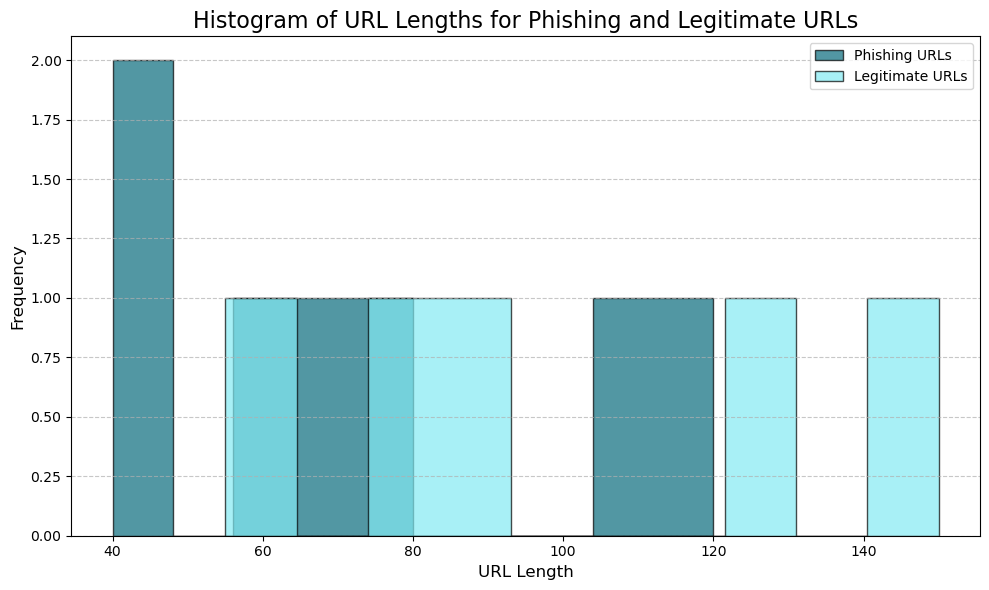

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset: Replace with your actual dataset
data = {
    'url_length': [75, 80, 60, 55, 120, 90, 40, 110, 150, 45, 130, 65],
    'label': ['phishing', 'legitimate', 'phishing', 'legitimate', 'phishing', 
              'legitimate', 'phishing', 'phishing', 'legitimate', 'phishing', 'legitimate', 'phishing']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Separate phishing and legitimate URLs
phishing_urls = df[df['label'] == 'phishing']['url_length']
legitimate_urls = df[df['label'] == 'legitimate']['url_length']

# Plot histogram for phishing and legitimate URLs
plt.figure(figsize=(10, 6))

# Histogram for phishing URLs (teal color)
plt.hist(phishing_urls, bins=10, alpha=0.7, label='Phishing URLs', color='#086b7c', edgecolor='black', histtype='stepfilled')

# Histogram for legitimate URLs (light cyan color)
plt.hist(legitimate_urls, bins=10, alpha=0.7, label='Legitimate URLs', color='#83ebf3', edgecolor='black', histtype='stepfilled')

# Add labels, title, and legend
plt.title('Histogram of URL Lengths for Phishing and Legitimate URLs', fontsize=16)
plt.xlabel('URL Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


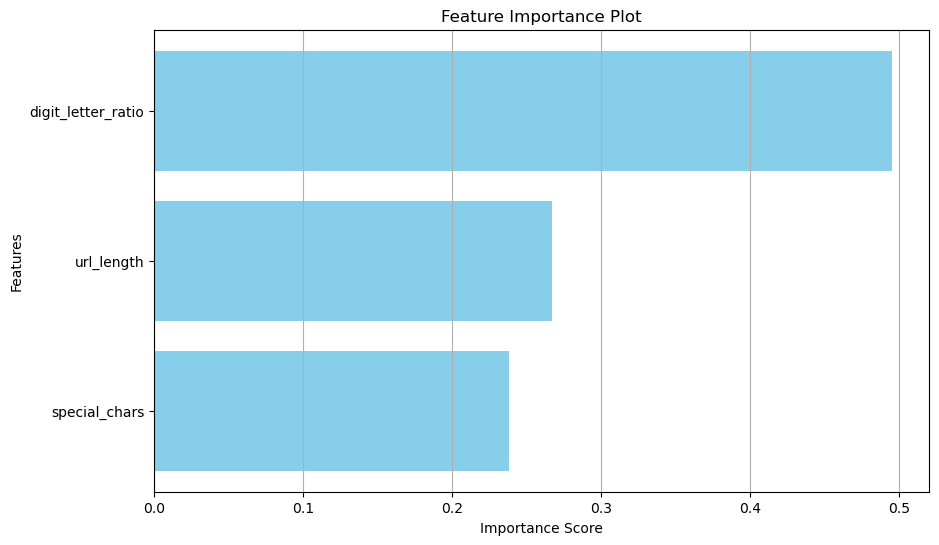

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Example dataset: Replace with your actual dataset and features
data = {
    'url_length': [75, 80, 60, 55, 120, 90, 40, 110, 150, 45, 130, 65],
    'special_chars': [5, 7, 4, 6, 8, 3, 5, 7, 9, 4, 8, 6],
    'digit_letter_ratio': [0.5, 0.6, 0.3, 0.4, 0.7, 0.5, 0.2, 0.8, 0.9, 0.3, 0.7, 0.4],
    'label': ['phishing', 'legitimate', 'phishing', 'legitimate', 'phishing', 
              'legitimate', 'phishing', 'phishing', 'legitimate', 'phishing', 'legitimate', 'phishing']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode the label (phishing=1, legitimate=0)
df['label'] = df['label'].map({'phishing': 1, 'legitimate': 0})

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance Plot')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.grid(True, axis='x')

# Show the plot
plt.show()



/var/folders/wz/v7wgk59j27lbhnxwqfqxcvk80000gn/T/ipykernel_3138/3719014366.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='entropy', data=df, palette='Set2')


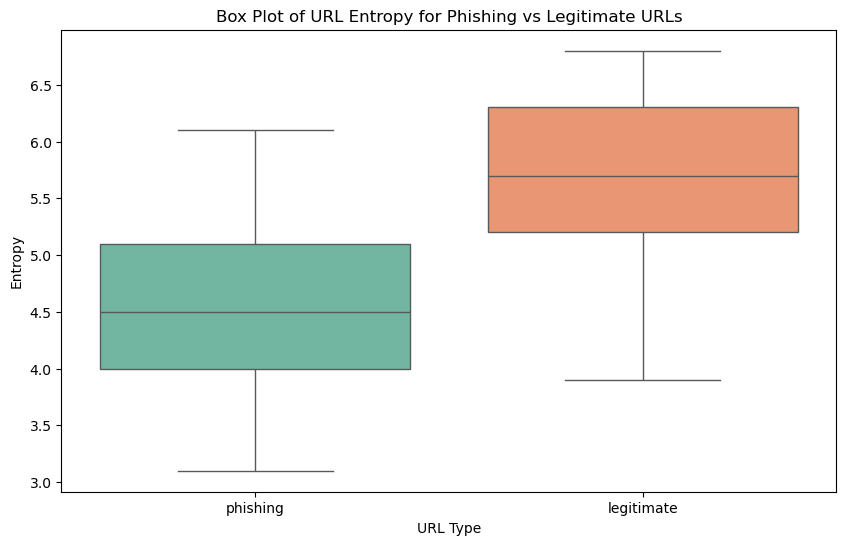

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset: Replace with your actual dataset
# Assume 'entropy' is a column representing URL entropy, and 'label' is phishing/non-phishing labels
data = {
    'entropy': [4.5, 5.2, 3.1, 6.8, 4.7, 3.9, 6.1, 5.5, 6.3, 4.2, 5.7, 3.8],
    'label': ['phishing', 'legitimate', 'phishing', 'legitimate', 'phishing', 
              'legitimate', 'phishing', 'phishing', 'legitimate', 'phishing', 'legitimate', 'phishing']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='entropy', data=df, palette='Set2')

# Add titles and labels
plt.title('Box Plot of URL Entropy for Phishing vs Legitimate URLs')
plt.xlabel('URL Type')
plt.ylabel('Entropy')

# Show the plot
plt.show()
